<a href="https://colab.research.google.com/github/AdiDev1411/Machine-learning/blob/main/Decision_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris


In [20]:
iris = load_iris()

In [21]:
df = pd.DataFrame(iris.data)

In [22]:
df.columns = iris.feature_names
df['specices']  = iris.target

In [46]:
df

,sepal length (cm),petal length (cm),specices
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [47]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [28]:
from sklearn.model_selection import train_test_split


In [48]:
x_train , x_test , y_train , y_test = train_test_split(X  ,y , test_size=0.2 , random_state= 42)
x_train.shape

(120, 2)

In [49]:
from sklearn.tree import DecisionTreeClassifier


In [98]:
clf = DecisionTreeClassifier(max_depth=3)

In [99]:
clf.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=3)

In [101]:
y_pred = clf.predict(x_test)

In [102]:
from sklearn.metrics import accuracy_score

In [103]:
from sklearn.metrics import r2_score

In [104]:
print("Accuracy score :" , r2_score(y_test , y_pred))

Accuracy score : 0.9523052464228935


In [105]:
from mlxtend.plotting import plot_decision_regions

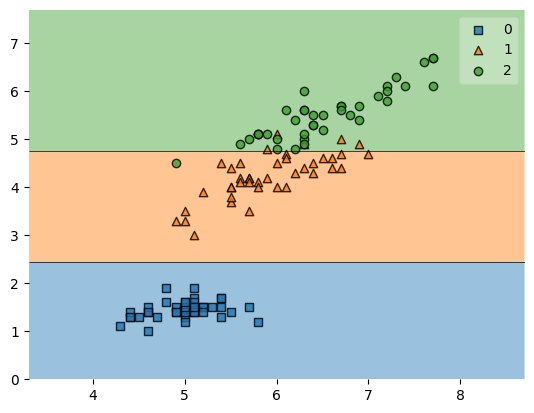

In [106]:
p = plot_decision_regions(x_train.values , y_train.values , clf )

[Text(0.375, 0.875, 'x[1] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[1] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[0] <= 4.95\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.125, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.75, 0.375, 'x[1] <= 5.05\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.625, 0.125, 'gini = 0.463\nsamples = 11\nvalue = [0, 4, 7]'),
 Text(0.875, 0.125, 'gini = 0.061\nsamples = 32\nvalue = [0, 1, 31]')]

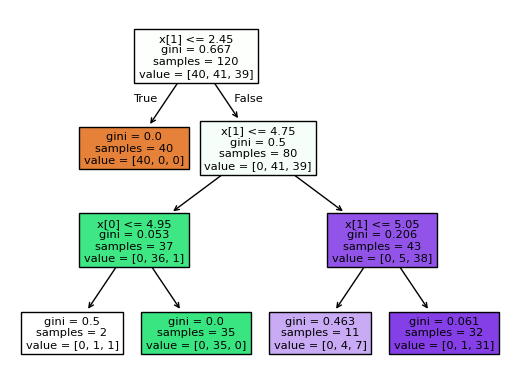

In [109]:
from sklearn.tree import plot_tree
plot_tree(clf, filled=True)

# **Hyperparamiter** **Tunning**

In [82]:
param_grid = {
    'criterion' :['gini', 'entropy', 'log_loss'],
    'max_depth' : [1,5,10,20,None]

}

In [78]:
from sklearn.model_selection import GridSearchCV

In [84]:
clf2 = GridSearchCV(estimator=clf , param_grid=param_grid , scoring='r2' , cv=5)

In [85]:
clf2.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=1),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 5, 10, 20, None]},
             scoring='r2')

In [86]:
clf2.best_score_

np.float64(0.9125)

<Axes: >

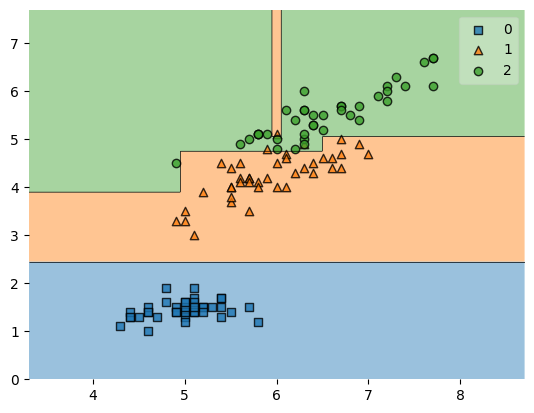

In [97]:
plot_decision_regions(x_train.values , y_train.values , clf )


In [110]:
model = clf2.best_estimator_

[Text(0.375, 0.9166666666666666, 'x[1] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.2916666666666667, 0.75, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.33333333333333337, 0.8333333333333333, 'True  '),
 Text(0.4583333333333333, 0.75, 'x[1] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.41666666666666663, 0.8333333333333333, '  False'),
 Text(0.25, 0.5833333333333334, 'x[0] <= 4.95\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.16666666666666666, 0.4166666666666667, 'x[1] <= 3.9\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.08333333333333333, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.6666666666666666, 0.5833333333333334, 'x[1] <= 5.05\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.5, 0.4166666666666667, 'x[0] <= 6.5\ngini 

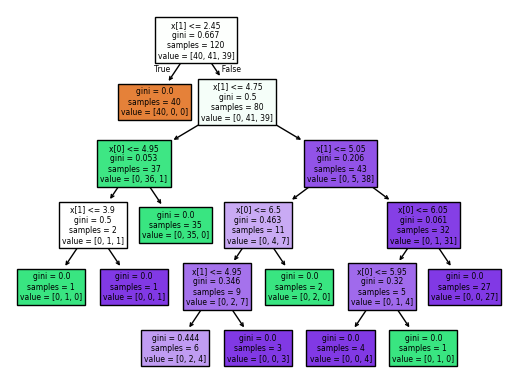

In [112]:
from sklearn.tree import plot_tree
plot_tree(model,filled=True)